In [1]:
# Importing necessary library
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd
from scipy import signal
from stingray import lightcurve
import sys
sys.path.append('C:/Users/fulky/OneDrive - UNIVERSITAS INDONESIA/Documents/Akademik/Final Year/Seminar/Code/bispectrum.py')
from bispectrum import Bispectrum
%matplotlib inline

c:\Users\fulky\anaconda3\envs\skripsi\lib\site-packages\stingray\utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
c:\Users\fulky\anaconda3\envs\skripsi\lib\site-packages\stingray\utils.py:40: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")


### Menghitung Matriks Cumulant orde ke-3

In [2]:
def calcCumulantOrde3(df_data, t):
    # Compute the bispectrum of the signal
    lc = lightcurve.Lightcurve(t,df_data.T)
    bs = Bispectrum(lc, maxlag=251)

    # Plot the bispectrum using contour plots
    plt.contour(bs.freq, bs.freq, bs.bispec_mag)
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.show()

    # Plot the bispectrum using mesh plots
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(bs.freq, bs.freq)
    ax.plot_surface(X, Y, bs.bispec_mag)
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    ax.set_zlabel('Bispectrum')
    plt.show()

    return bs

### Melakukan dekomposisi wavelet

In [3]:
def calcWaveletDec(bs):
    # Select wavelet and decomposition level
    wavelet = 'db4'
    level = 5

    # Deecompose signal
    coeffs = pywt.wavedec(bs.cum3, wavelet, level=level)
    
    # Visualize
    approximations = []
    details = []
    for i in range(level):
        approximations.append(coeffs[i])
        details.append(coeffs[level - i])

    fig, axs = plt.subplots(len(coeffs), sharex=True)
    for i, c in enumerate(coeffs):
        axs[i].plot(c)
        axs[i].set_ylabel(f'Level {i}')
    plt.show()
    return coeffs

### Menghitung energi relatif

In [4]:
def calcRelativeEnergy(coeffs, df_data):
    # Calculate relative wavelet energy
    energies = []
    for c in coeffs:
        energies.append(np.sum(np.square(c)))

    decomp = ['A5', 'D1', 'D2', 'D3', 'D4', 'D5']

    temp = energies
    energies[1:6] = energies[-1:-6:-1]

    total_energy = np.sum(np.square(df_data.T))
    relative_energies = [e / total_energy for e in energies]

    plt.plot(decomp, energies)
    plt.xlabel('Dimension Number')
    plt.ylabel('Wavelet Bispectrum Energy')
    plt.show()

    plt.plot(decomp, relative_energies)
    plt.xlabel('Dimension Number')
    plt.ylabel('Relative Wavelet Bispectrum Energy')
    plt.show()

    print(energies)
    print(relative_energies)

    return energies, relative_energies

### Persiapan data

c:\Users\fulky\anaconda3\envs\skripsi\lib\site-packages\stingray\lightcurve.py:310: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


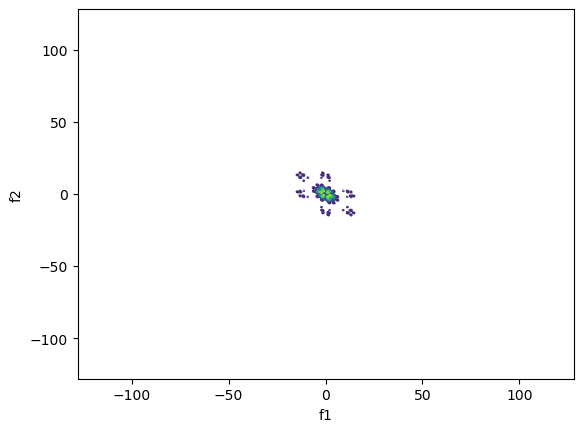

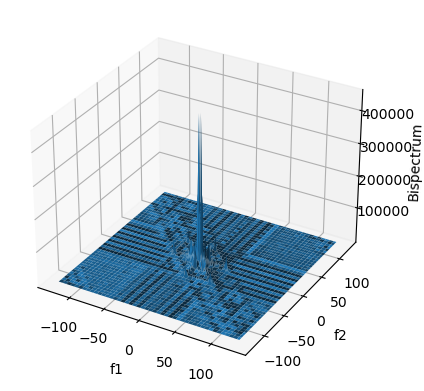

[-29.39117877 -30.50482664 -29.59001231 -29.82107007 -31.19808596
 -23.94314926  -5.66485003   1.10631755  45.82881269  -5.31898949
  -9.69184585  -0.63014072  -5.62166964  -1.92014534   0.
   0.           0.           0.           0.           0.
   0.           0.        ]


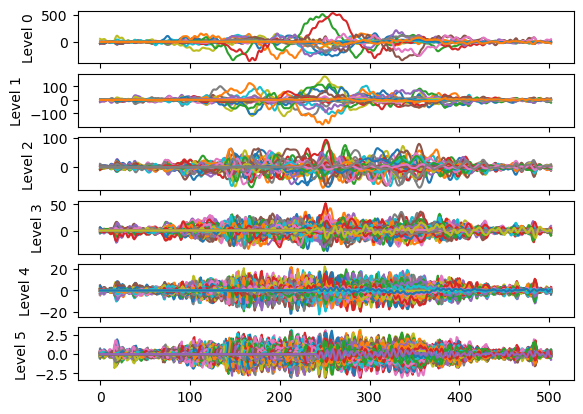

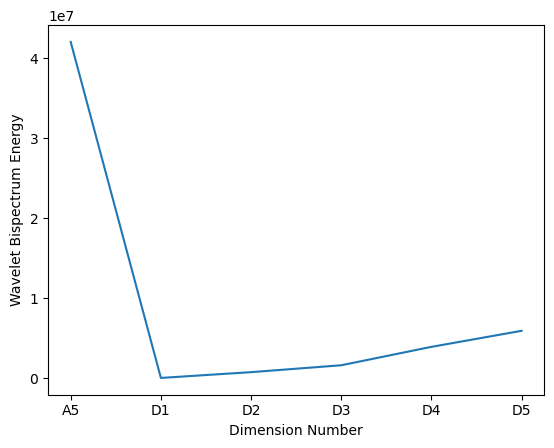

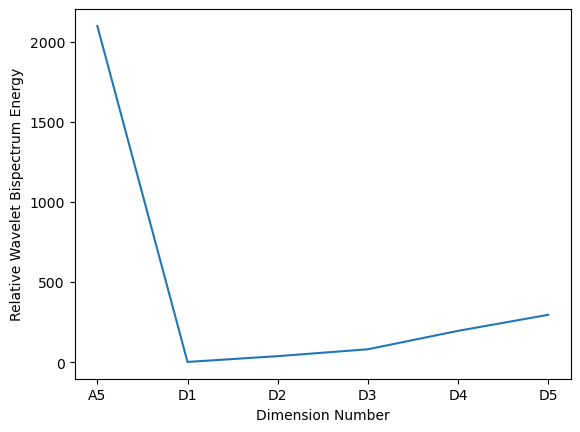

[42033558.70969229, 32337.41305867631, 753257.8091099395, 1614699.9849334601, 3916777.1527413186, 5921573.6271229535]
[2097.4473154530738, 1.6136159366629634, 37.58707609016701, 80.5724819078874, 195.44463938883447, 295.4826830925181]
[42033558.70969229, 32337.41305867631, 753257.8091099395, 1614699.9849334601, 3916777.1527413186, 5921573.6271229535]
[2097.4473154530738, 1.6136159366629634, 37.58707609016701, 80.5724819078874, 195.44463938883447, 295.4826830925181]


In [6]:
# Define sampling frequency
fs = 256
t = np.arange(0, 1, 1/fs)

# Load data from CSV
data = np.loadtxt("out.csv", delimiter=",", skiprows=1, usecols=range(3,259))
channel_name = np.loadtxt("out.csv", delimiter=",", skiprows=1, usecols=1, dtype='str', encoding='utf-8')
df_data = pd.DataFrame(data.T, columns=channel_name)
df_data
energies, relative_energies = calcRelativeEnergy(calcWaveletDec(calcCumulantOrde3(df_data['FP1'], t)), df_data['FP1'])